# Machine Learning with Scikit Learn

### Unsupervised Learning - Clustering

In [1]:
# Here we will look at 3 attributes of irises and cluster the data.
# Hopefully this will identify distinct groups of irises


In [2]:
# First, make sure we start matplotlib so we can see the results!
%matplotlib inline

In [3]:
#Do the imports we need
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import sklearn.cluster as cst
from sklearn import datasets

In [4]:
# The Kmeans clustering we will use has some aspect of randomness
# Use a seed so that our data will all look the same
np.random.seed(5) # You can use whatever seed you would like.
#np.random.seed() ---->if no seed is supplied NumPy will use the current system time on the computer

# Load the data we need
''' NOTE: The Iris data set is an example data set that Scikit Learn provides.
    Here I use it as an example to learn about how the clustering model and algorithm work.
    In reality you would be using your own data
'''
iris = datasets.load_iris()
X = iris.data

In [5]:
# Let's see what the data looks like
print(X.shape)

(150, 4)


In [7]:
''' It has 150 samples, and 4 variables
'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'
 More information about the datastructer for iris can be found here: 
 
 http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris
'''
# The feature names are here
for i,feature in enumerate(iris.feature_names):
    print('Index: %i, Feature: %s' %(i, feature)) # Notice in the print lines that '%i' and '%s' are replaced by
                                                 # the values for 'i' and 'feature', respectively
                                                 # These are known as tokens, more found here:
                                                 # https://docs.python.org/2/library/string.html#string-formatting

Index: 0, Feature: sepal length (cm)
Index: 1, Feature: sepal width (cm)
Index: 2, Feature: petal length (cm)
Index: 3, Feature: petal width (cm)


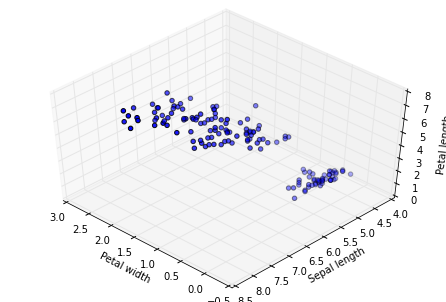

In [7]:
# Let's see what the data looks like in 3D
fig = plt.figure()
ax = Axes3D(fig, elev=48, azim=134)

# We can only plot 3 dimensions at a time, even though there are 4 variables

# We'll only use petal width, sepal length, and petal length, so indices 3, 0, and 2
ax.scatter(X[:,3], X[:, 0], X[:, 2])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()

['setosa' 'versicolor' 'virginica']


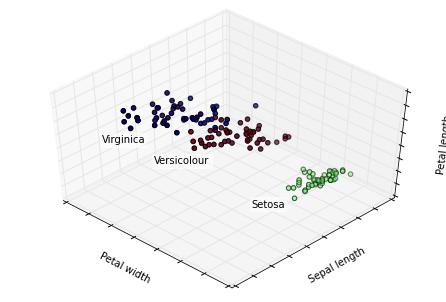

In [10]:
# Initialize a kmeans clustering object
# We don't know how many groups there should be, so let's just guess and check
# You can change the value for n_clusters
model = cst.KMeans(n_clusters = 3)
model.fit(X)

# This specifies what cluster each data point will be in
labels = model.labels_

#Now let's figure out what it looks like
fig = plt.figure()
ax = Axes3D(fig, elev=48, azim=134)
ax.scatter(X[:,3], X[:, 0], X[:, 2], c=labels.astype(np.float))

# Let's turn off those pesky tick labels
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')

# But because this is test data we know the actual values
y = iris.target

# So we can go back and set the clusters to 3 and re-run it

# We could also add labels because we know the right species
print(iris.target_names)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y)

plt.show()


### Supervised Learning - Classification

(1797, 8, 8)


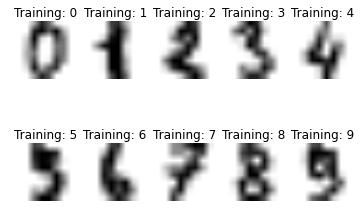

In [12]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset.
digits = datasets.load_digits()
print(digits.images.shape)

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 10 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# pylab.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.

# Let's zip together the image with the value it should represent
# Images and labels will look like this [(8x8 image, number), (8x8 image, number), (8x8 image, number), etc...]
images_and_labels = list(zip(digits.images, digits.target))

# In this for loop we will enumerate through the variable we just made returning an index, image, and it's number label
for index, (image, label) in enumerate(images_and_labels[:10]):
    #If you aren't clear about what enumerating does, try uncommenting this next lines and seeing what the output is
    """print "Index: ", index
    print "Image Matrix:", image
    print"Correct number: ", label, '\n'"""
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r)# interpolation='nearest')
    plt.title('Training: %i' % label)
plt.show()



[8 8 4 9]


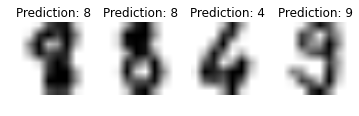

In [13]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We train tthe digits on the first half of the digits
training_images = data[:n_samples/2]
training_label = digits.target[:n_samples/2]
classifier.fit(training_images, training_label)

# Now predict the value of the digit on the second half:
images_to_predict = data[n_samples / 2:]
predicted = classifier.predict(images_to_predict)

# Now let's see how good of a job it did predicting the image classification
print(predicted[:4])

images_and_predictions = list(zip(digits.images[n_samples / 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')j
    plt.imshow(image, cmap=plt.cm.gray_r)# interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()